# Восстановление золота из руды

Нужно подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используем данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.


**Описание данных**

Технологический процесс

* Rougher feed — исходное сырье

* Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant

* Xanthate — ксантогенат (промотер, или активатор флотации);

* Sulphate — сульфат (на данном производстве сульфид натрия);

* Depressant — депрессант (силикат натрия).

* Rougher process (англ. «грубый процесс») — флотация

* Rougher tails — отвальные хвосты

* Float banks — флотационная установка

* Cleaner process — очистка

* Rougher Au — черновой концентрат золота

* Final Au — финальный концентрат золота

Параметры этапов

* air amount — объём воздуха

* fluid levels — уровень жидкости

* feed size — размер гранул сырья

* feed rate — скорость подачи

Наименование признаков

Наименование признаков должно быть такое:
[этап].[тип_параметра].[название_параметра]
Пример: rougher.input.feed_ag

Возможные значения для блока [этап]:

* rougher — флотация

* primary_cleaner — первичная очистка

* secondary_cleaner — вторичная очистка

* final — финальные характеристики

Возможные значения для блока [тип_параметра]:

* input — параметры сырья

* output — параметры продукта

* state — параметры, характеризующие текущее состояние этапа

* calculation — расчётные характеристики

<h1>Содержание<span class="tocSkip"></span></h1>

<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeRegressor" data-toc-modified-id="DecisionTreeRegressor-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>DecisionTreeRegressor</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#Лучшая-модель" data-toc-modified-id="Лучшая-модель-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Лучшая модель</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Подготовка данных

In [1]:
# импортируем библиотеки
import pandas as pd
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
import warnings
warnings.simplefilter('ignore')

In [2]:
# открываем файлы
gold_recovery_train_new = pd.read_csv('/Users/dmitrijvolgin/Downloads/Я_Практикум/Проекты/Сборный проект 2/gold_recovery_train_new.csv',
                                      index_col='date', parse_dates=['date'])

gold_recovery_test_new = pd.read_csv('/Users/dmitrijvolgin/Downloads/Я_Практикум/Проекты/Сборный проект 2/gold_recovery_test_new.csv',
                                     index_col='date', parse_dates=['date'])

gold_recovery_full_new = pd.read_csv('/Users/dmitrijvolgin/Downloads/Я_Практикум/Проекты/Сборный проект 2/gold_recovery_full_new.csv',
                                     index_col='date', parse_dates=['date'])


In [3]:
# знакомимся с данными
df_list = [gold_recovery_train_new, gold_recovery_test_new, gold_recovery_full_new]

def info (df):
    for i in df:
        print(i.info())
        print()
        print(i.isna().sum())
        print()
        print('Сумма дубликатов =',i.duplicated().sum())
        print()
        display(i.head())
        print('################################')
        
info(df_list)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                     

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


################################
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


################################
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.ou

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


################################


In [4]:
# функция расчета признака rougher.output.recovery
def recovery (c, f, t):
    result = (c*(f-t))/(f*(c-t))*100
    return result

In [5]:
# применение финкции для расчета признака rougher.output.recovery
gold_recovery_train_new['recovery'] = recovery(gold_recovery_train_new['rougher.output.concentrate_au'],
                                              gold_recovery_train_new['rougher.input.feed_au'],
                                              gold_recovery_train_new['rougher.output.tail_au'])

In [6]:
# расчет MAE для оценки корректности значений rougher.output.recovery в данных с нашим расчетом
print(mean_absolute_error(gold_recovery_train_new['rougher.output.recovery'], gold_recovery_train_new['recovery']))

9.73512347450521e-15


In [7]:
# сравним признаки в обучающей и тестовой выборк, и выделим разницу
gold_recovery_test_new_columns = gold_recovery_test_new.columns
gold_recovery_train_new_columns = gold_recovery_train_new.columns

missing_columns = []

for i in range(len(gold_recovery_train_new_columns)):
    if gold_recovery_train_new_columns[i] not in gold_recovery_test_new_columns:
        missing_columns.append(gold_recovery_train_new_columns[i])
        
missing_columns

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

In [8]:
# заменим в тестовых и обучающих выборках пропуски на соседние значения 
gold_recovery_train_new = gold_recovery_train_new.ffill(axis = 1)
gold_recovery_train_new = gold_recovery_train_new.bfill(axis = 1)

gold_recovery_test_new = gold_recovery_test_new.ffill(axis = 1)
gold_recovery_test_new = gold_recovery_test_new.bfill(axis = 1)

In [9]:
gold_recovery_train_new.isna().sum()

final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
final.output.recovery                         0
                                             ..
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
recovery                                      0
Length: 87, dtype: int64

In [10]:
gold_recovery_test_new.isna().sum()

primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.input.floatbank11_sulfate       

### Вывод

Ознакомились с данными, также была проведена проверка правильности расчета признака rougher.output.recovery - рассчатав данный признак самостоятельно и сравнив с помощью подсчета MAE с данными в датафрейме мы видим, что MAE стремится к нулю, поэтому можно считать, что признак rougher.output.recovery рассчитан верно. Также в обучающих и тестовых выборках были обноружены пропуски, ввиду того cоседние по времени параметры часто похожи, заменили пропуски как раз на них. 

Также сравнив признаки в обучающей и тестовой выборках стало понятно, что они отличаются. В тестовой отсутствуют признаки final.output, primary_cleaner.output, rougher.calculation, rougher.output, secondary_cleaner.output этапов, т.е. в тестовой выборке только признаки сырья до флотации. Поэтому нужно привести их к единообразию и удалить из тренировочной лишнее, что и было сделано.

## Анализ данных

In [11]:
# функция построения гистограмм концетраций металлов на различных этапах очистки.
def hist_metal(raw, rougher, primary, final, name):
    
    plt.figure(figsize=(12, 7))
    plt.hist(raw, bins=70, alpha=0.5, label='Исходное сырьё', histtype='step', linewidth=3)
    plt.hist(rougher, bins=70, alpha=0.5, label='После флотации', histtype='step', linewidth=3)
    plt.hist(primary, bins=70, alpha=0.5, label='После первого этапа очистки', histtype='step', linewidth=3)
    plt.hist(final, bins=70, alpha=0.5, label='После второго этапа очистки', histtype='step', linewidth=3)
    plt.grid(ls=':')
    plt.title(name)
    plt.xlabel('Концентрация')
    plt.ylabel('Количество')
    plt.legend()
    plt.show()
 


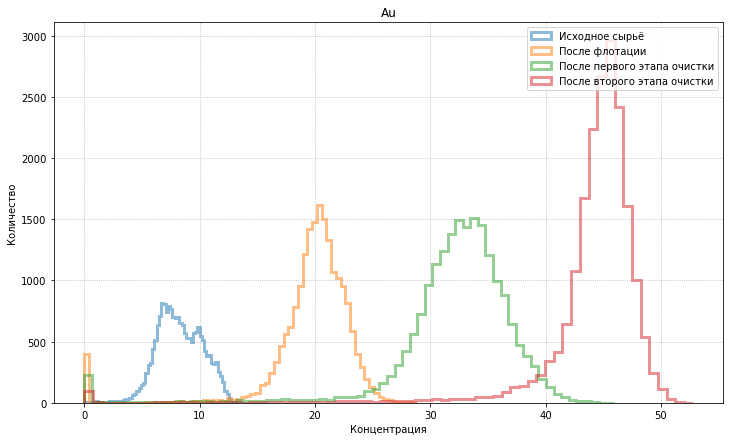

In [12]:
# рассмотрим концетрацию золота на различных этапах очистки
hist_metal(gold_recovery_full_new['rougher.input.feed_au'], 
           gold_recovery_full_new['rougher.output.concentrate_au'], 
           gold_recovery_full_new['primary_cleaner.output.concentrate_au'], 
           gold_recovery_full_new['final.output.concentrate_au'], 
           'Au')

Видим, что концктрация золота после каждого этапа очистки увеличивается. Однако стоит отметить, что присутствуют нулевые значения после на каждом этапе очистки.

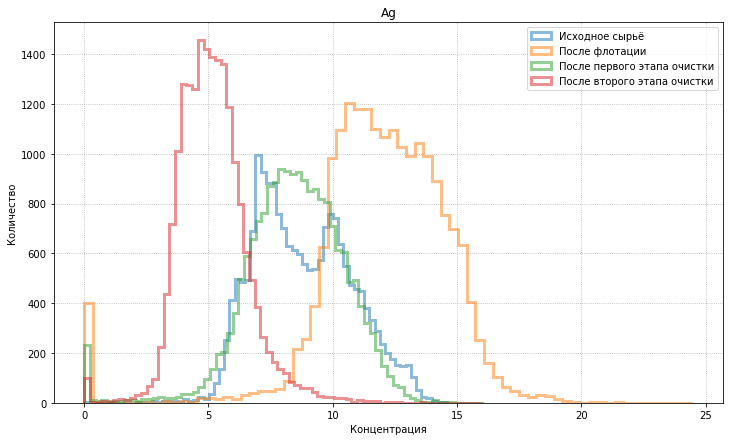

In [13]:
# рассмотрим концетрацию серебра на различных этапах очистки
hist_metal(gold_recovery_full_new['rougher.input.feed_ag'], 
           gold_recovery_full_new['rougher.output.concentrate_ag'], 
           gold_recovery_full_new['primary_cleaner.output.concentrate_ag'], 
           gold_recovery_full_new['final.output.concentrate_ag'], 
           'Ag')

В ситуации с серебром уже не все так очевидно. Концетрация серебра не падает в зависисимости от от исходного сырья к финальному этапу. Так например распределение концетрации серебра на этапе сырья похоже на распредление концетрации после первого этапа очистки, но все же после второго этапа очистки концетрация серебра меньше всего. Стоит отметить, что присутствуют нулевые значения после на каждом этапе очистки.

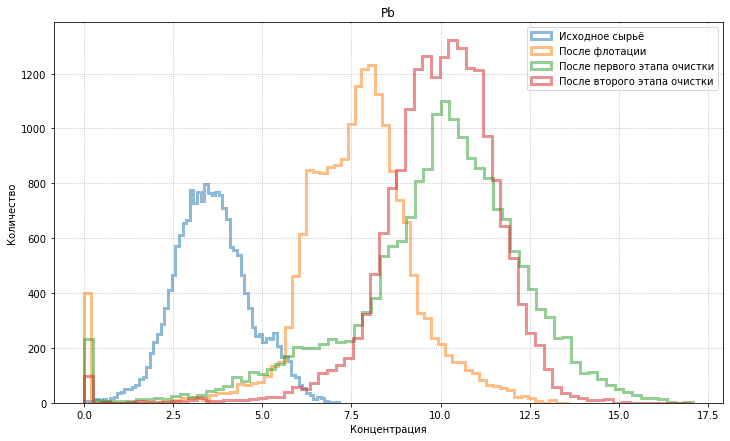

In [14]:
# рассмотрим концетрацию свинца на различных этапах очистки
hist_metal(gold_recovery_full_new['rougher.input.feed_pb'], 
           gold_recovery_full_new['rougher.output.concentrate_pb'], 
           gold_recovery_full_new['primary_cleaner.output.concentrate_pb'], 
           gold_recovery_full_new['final.output.concentrate_pb'], 
           'Pb')

И совсем иная ситуация со свинцом. Концетрация увеличивается к финальным этапам очистки. Стоит отметить, что присутствуют нулевые значения после на каждом этапе очистки. 

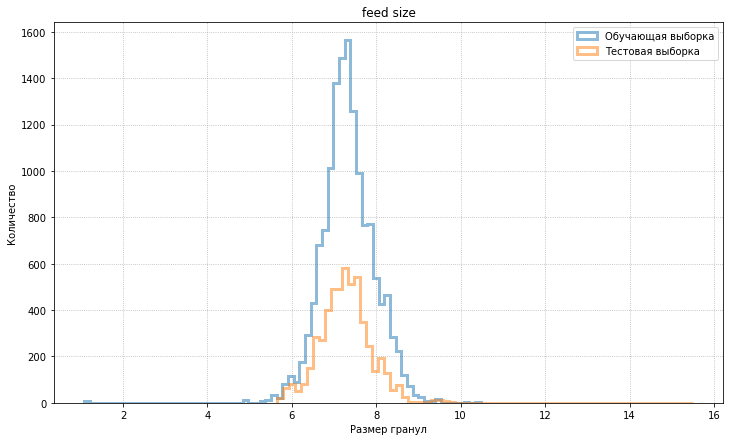

In [15]:
# строим гистограмму распределения размеров гранул сырья на обучающей и тестовой выборках
plt.figure(figsize=(12, 7))
plt.hist(gold_recovery_train_new['primary_cleaner.input.feed_size'], bins=70, alpha=0.5, 
         label='Обучающая выборка', histtype='step', linewidth=3)
plt.hist(gold_recovery_test_new['primary_cleaner.input.feed_size'], bins=70, alpha=0.5, 
         label='Тестовая выборка', histtype='step', linewidth=3)
plt.grid(ls=':')
plt.title('feed size')
plt.xlabel('Размер гранул')
plt.ylabel('Количество')
plt.legend()
plt.show()

Видно, что распределения размеров гранул сырья на обучающей и тестовой выборках отличается не сильно, поэтому ожидаем правильную оценку модели.

In [16]:
# Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Для этого посчитаем их сумму
gold_recovery_full_new['total_raw'] = (gold_recovery_full_new['rougher.input.feed_ag'] + gold_recovery_full_new['rougher.input.feed_pb'] + 
                                        gold_recovery_full_new['rougher.input.feed_sol'] + gold_recovery_full_new['rougher.input.feed_au'])

gold_recovery_full_new['total_rougher'] = (gold_recovery_full_new['rougher.output.concentrate_ag'] + gold_recovery_full_new['rougher.output.concentrate_pb'] + 
                                            gold_recovery_full_new['rougher.output.concentrate_sol'] + gold_recovery_full_new['rougher.output.concentrate_au'])

gold_recovery_full_new['total_final'] = (gold_recovery_full_new['final.output.concentrate_ag'] + gold_recovery_full_new['final.output.concentrate_pb'] + 
                                            gold_recovery_full_new['final.output.concentrate_sol'] + gold_recovery_full_new['final.output.concentrate_au'])


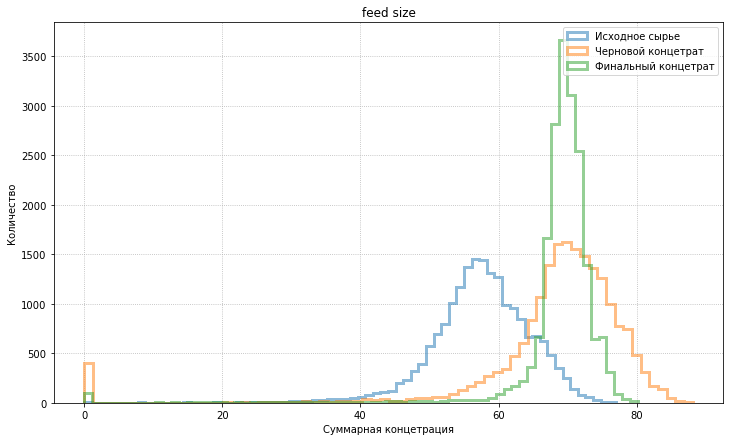

In [17]:
# построим распределения суммарных концетраций
plt.figure(figsize=(12, 7))
plt.hist(gold_recovery_full_new['total_raw'], bins=70, alpha=0.5, label='Исходное сырье', histtype='step', linewidth=3)
plt.hist(gold_recovery_full_new['total_rougher'], bins=70, alpha=0.5, label='Черновой концетрат', histtype='step', linewidth=3)
plt.hist(gold_recovery_full_new['total_final'], bins=70, alpha=0.5, label='Финальный концетрат', histtype='step', linewidth=3)
plt.grid(ls=':')
plt.title('feed size')
plt.xlabel('Суммарная концетрация')
plt.ylabel('Количество')
plt.legend()
plt.show()

Рассмотрев суммарные распределения веществ на различных этапах мы видим, что снова присутствуют нулевые значения, думаю, что это явно какая-то ошибка, поэтому далее я уберу данные значения из обучающей и тестовых выборок.

In [18]:
# выделяем необходимые признаки
features_raw = ['rougher.input.feed_ag', 'rougher.input.feed_pb',
               'rougher.input.feed_sol', 'rougher.input.feed_au']

features_rougher = ['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb',
                   'rougher.output.concentrate_sol', 'rougher.output.concentrate_au']

features_final = ['final.output.concentrate_ag', 'final.output.concentrate_pb',
                 'final.output.concentrate_sol', 'final.output.concentrate_au']

In [19]:
# убираем из тестовой и обучающей выборки позиции с нулевой суммарной концетрацией веществ

df_train = gold_recovery_train_new[gold_recovery_train_new[features_raw].sum(1) > 0]
df_train = df_train[df_train[features_rougher].sum(1) > 0]
df_train = df_train[df_train[features_final].sum(1) > 0]

df_full = gold_recovery_full_new.loc[gold_recovery_test_new.index]

df_test = gold_recovery_test_new[df_full[features_raw].sum(1) > 0]
df_test = df_test[df_full[features_rougher].sum(1) > 0]
df_test = df_test[df_full[features_final].sum(1) > 0]

In [20]:
# удаляем из обучающей выборки признаки, чтобы привести в соотвествие с тестовой выборкой
df_train = df_train.drop(['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol',
                          'final.output.concentrate_au', 'final.output.tail_ag',
                          'final.output.tail_pb', 'final.output.tail_sol', 'final.output.tail_au',
                          'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb',
                          'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au',
                          'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
                          'primary_cleaner.output.tail_au', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.calculation.floatbank10_sulfate_to_au_feed',
                          'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag',
                          'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au',
                          'rougher.output.tail_ag', 'rougher.output.tail_pb', 'rougher.output.tail_sol', 'rougher.output.tail_au', 'secondary_cleaner.output.tail_ag',
                          'secondary_cleaner.output.tail_pb', 'secondary_cleaner.output.tail_sol', 'secondary_cleaner.output.tail_au',
                          'recovery'], axis = 1)

### Вывод

В процессе рассмотрения концетрации веществ на различных этапах очистки нельзя сделать общий вывод для всех вещества, так как картина везде разная - например концетрация свинца увеличивается к финальным этапам очистки. В процессе беглового анализа сети на предмет технелогического процесса получения золота из сырья я понял, что далее следуют доплнительные этапы отделения веществ друг от друга, поэтому считаю полученную картину нормой технологического процесса.

В процессе анализа размеров гранул сырья видно, что распределения размеров гранул сырья на обучающей и тестовой выборках отличается не сильно, поэтому ожидаем правильную оценку модели.

Рассмотрев суммарную концетрацию веществ на различных этапах мы видим, что есть позиции с нулевой значимостью, вероятнее всего это какая-то ошибка, поэтому необходимо убрать данные значения из обучающей и тестовых выборок.

Для подготовки к следующему этапу обучающая и тестовая выборки были приведены к единообразию и лишние признаци были удалены из обучающей выборки.

## Модель

In [21]:
# функция для вычисления итоговой sMAPE
def final_smape(y, y_hat):
   y_rougher = y.iloc[:, 0]
   y_hat_rougher = y_hat[:, 0]
   rougher_num = np.abs(y_rougher - y_hat_rougher)
   rougher_den = (np.abs(y_rougher) + np.abs(y_hat_rougher)) / 2
   smape_rougher = np.mean(rougher_num / rougher_den) * 100
   y_final = y.iloc[:, 1]
   y_hat_final = y_hat[:, 1]
   final_num = np.abs(y_final - y_hat_final)
   final_den = (np.abs(y_final) + np.abs(y_hat_final)) / 2
   smape_final = np.mean(final_num / final_den) * 100
   final_smape = smape_rougher * 0.25 + smape_final * 0.75
   return final_smape

smape_score = make_scorer(final_smape, greater_is_better=False)

In [22]:
# определяем целевой и прочие признаки для моделей
target_test = df_full[['final.output.recovery', 'rougher.output.recovery']].loc[df_test.index]
features_test = df_test

target_train = df_train[['final.output.recovery', 'rougher.output.recovery']].reset_index(drop=True)
features_train = df_train.drop(['final.output.recovery', 'rougher.output.recovery'], axis=1)

### DecisionTreeRegressor

In [23]:
%time
# подбираем параметра для решающего дерева
clf = DecisionTreeRegressor(random_state=12345)

parametrs = { 
             'max_depth': range (1,30, 2)
            }

grid = GridSearchCV(clf, parametrs, cv=5, scoring = smape_score)
grid.fit(features_train, target_train)


CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.2 µs


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=12345),
             param_grid={'max_depth': range(1, 30, 2)},
             scoring=make_scorer(final_smape, greater_is_better=False))

In [24]:
print(grid.best_params_)
grid.best_score_

{'max_depth': 1}


-7.695434118832995

### RandomForestRegressor

In [25]:
%time
# подбираем параметры для случайного леса
clf = RandomForestRegressor(random_state=12345)

parametrs = {'n_estimators': range (1, 20,3), 
             'max_depth': range (1,20,3)
            }

grid = GridSearchCV(clf, parametrs, cv=5, scoring = smape_score)
grid.fit(features_train, target_train)


CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 3.1 µs


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=12345),
             param_grid={'max_depth': range(1, 20, 3),
                         'n_estimators': range(1, 20, 3)},
             scoring=make_scorer(final_smape, greater_is_better=False))

In [26]:
print(grid.best_params_)
grid.best_score_

{'max_depth': 4, 'n_estimators': 13}


-7.29424923769742

### LinearRegression

In [27]:
%time
# проверяем качество кросс-валидацией
model_lr =  LinearRegression()

scores_lr = cross_val_score(model_lr, features_train, target_train, cv=5, scoring = smape_score)

final_score_lr = sum(scores_lr) / len(scores_lr)

final_score_lr

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 9.06 µs


-8.419154727148438

### Лучшая модель

In [29]:
%time
# проверяем качество предсказания модели случайного леса на тестовой выборке
model_rf = RandomForestRegressor(random_state=12345, max_depth = 4, n_estimators = 13)
model_rf.fit(features_train, target_train) 
predictions = model_rf.predict(features_test)

calculate_final_smape_test = final_smape(target_test, predictions)

calculate_final_smape_test

CPU times: user 7 µs, sys: 2 µs, total: 9 µs
Wall time: 18.4 µs


5.868107202253755

In [30]:
%time
# проверяем качество предсказания константной модели на тестовой выборке

model_dr = DummyRegressor()

model_dr.fit(features_train,target_train)

predictions_dr = model_dr.predict(features_test)

calculate_final_smape_test_ds = final_smape(target_test, predictions_dr)

calculate_final_smape_test_ds

CPU times: user 7 µs, sys: 2 µs, total: 9 µs
Wall time: 17.9 µs


6.174713273554232

### Вывод

В результате обучения моделей решающего дерева, случайного леса и линейной регрессии и проверки их качества кросс-валидацией(в которую мы через make_scorer() поместили нашу функцию для проверки sMAPE) лучший результат показала модель случайного леса. Пременив ее на тестовой выборке мы получули более лучший результат чем на обучающих данных, что свидельствует о небольшом недообучении модели. Также при сравнении с константной моделью видим, что результат функции подсчета итогового sMAPE в модели случайного леса получился лучше, что свидельствует о адекватности предсказания нашей модели.